## Problem Statement --)To predict the No. of crimes happen in the year 2001 to 2012 in different District

##### IPC = The Indian Penal Code (IPC) is the official criminal code of India.It is a comprehensive code intended to cover all             substantive aspects of criminal law.  
##### It is applicable to all the citizens of India. The IPC has been amended numerous times since then and is now supplemented by various other criminal provisions. At present, the IPC is divided into 23 chapters and contains 511 sections in total.

# Important Libraries:

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
data=pd.read_csv(r"C:\Dekstop\DataSets\Project\District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
data=data.rename(columns={"TOTAL IPC CRIMES":"TOTAL_IPC_CRIMES","ATTEMPT TO MURDER":"ATTEMPT_TO_MURDER","CULPABLE HOMICIDE NOT AMOUNTING TO MURDER":"CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER","CUSTODIAL RAPE":"CUSTODIAL_RAPE","OTHER RAPE":"OTHER_RAPE","KIDNAPPING & ABDUCTION":"KIDNAPPING_and_ABDUCTION","KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS":"KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS","KIDNAPPING AND ABDUCTION OF OTHERS":"KIDNAPPING_AND_ABDUCTION_OF_OTHERS","STATE/UT":"STATE_or_UT","PREPARATION AND ASSEMBLY FOR DACOITY":"PREPARATION_AND_ASSEMBLY_FOR_DACOITY","AUTO THEFT":"AUTO_THEFT","OTHER THEFT":"OTHER_THEFT","CRIMINAL BREACH OF TRUST":"CRIMINAL_BREACH_OF_TRUST","HURT/GREVIOUS HURT":"HURT_or_GREVIOUS_HURT","DOWRY DEATHS":"DOWRY_DEATHS","ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY":"ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY","INSULT TO MODESTY OF WOMEN":"INSULT_TO_MODESTY_OF_WOMEN","CRUELTY BY HUSBAND OR HIS RELATIVES":"CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES","IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES":"IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES","CAUSING DEATH BY NEGLIGENCE":"CAUSING_DEATH_BY_NEGLIGENCE","OTHER IPC CRIMES":"OTHER_IPC_CRIMES"})

In [4]:
data.head()

,index,STATE_or_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,...,ARSON,HURT_or_GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507


In [5]:
data.shape

(9017, 34)

In [6]:
data.TOTAL_IPC_CRIMES.value_counts()         

170      9
56       9
44       9
27       9
42       9
        ..
34       1
4863     1
16168    1
7435     1
4281     1
Name: TOTAL_IPC_CRIMES, Length: 5010, dtype: int64

#### TOTAL_IPC_CRIMES -- Target column .  It is the variable that the user would want to predict using the rest of the dataset. 

# Cleaning Part

In [7]:
l=data["index"]
l

0          0
1          1
2          2
3          3
4          4
        ... 
9012    9012
9013    9013
9014    9014
9015    9015
9016    9016
Name: index, Length: 9017, dtype: int64

In [8]:
data=data.drop(["index"],axis=1)
data.head(2)

,STATE_or_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_and_ABDUCTION,...,ARSON,HURT_or_GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125


# Missing Value Treatment

Missing values are usually represented in the form of Nan or null or None in the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE_or_UT                                          9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9017 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL_RAPE                                       9017 non-null   int64 
 8   OTHER_RAPE                                           9017 non-null   int64 
 9

In [10]:
data.isnull().sum()

STATE_or_UT                                            0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT_TO_MURDER                                      0
CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER              0
RAPE                                                   0
CUSTODIAL_RAPE                                         0
OTHER_RAPE                                             0
KIDNAPPING_and_ABDUCTION                               0
KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS            0
KIDNAPPING_AND_ABDUCTION_OF_OTHERS                     0
DACOITY                                                0
PREPARATION_AND_ASSEMBLY_FOR_DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO_THEFT                     

# Data types Conversion

In [11]:
data.dtypes

STATE_or_UT                                            object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT_TO_MURDER                                       int64
CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER               int64
RAPE                                                    int64
CUSTODIAL_RAPE                                          int64
OTHER_RAPE                                              int64
KIDNAPPING_and_ABDUCTION                                int64
KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS             int64
KIDNAPPING_AND_ABDUCTION_OF_OTHERS                      int64
DACOITY                                                 int64
PREPARATION_AND_ASSEMBLY_FOR_DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

# Label Encoder

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
data.STATE_or_UT=le.fit_transform(data.STATE_or_UT)

In [14]:
data.DISTRICT=le.fit_transform(data.DISTRICT)

In [15]:
data.STATE_or_UT.value_counts()

32    878
19    628
20    552
4     540
30    469
28    454
25    430
16    399
11    384
1     370
3     362
14    322
27    314
15    312
34    309
12    268
6     266
17    233
2     195
9     183
13    176
33    168
24    138
21    125
23    108
22     96
31     67
29     60
0      36
8      36
10     36
26     31
5      24
7      24
18     24
Name: STATE_or_UT, dtype: int64

In [16]:
data.DISTRICT.value_counts()

753    408
240     46
706     37
547     37
801     36
      ... 
608      1
494      1
396      1
2        1
127      1
Name: DISTRICT, Length: 808, dtype: int64

In [17]:
data.dtypes

STATE_or_UT                                            int32
DISTRICT                                               int32
YEAR                                                   int64
MURDER                                                 int64
ATTEMPT_TO_MURDER                                      int64
CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER              int64
RAPE                                                   int64
CUSTODIAL_RAPE                                         int64
OTHER_RAPE                                             int64
KIDNAPPING_and_ABDUCTION                               int64
KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS            int64
KIDNAPPING_AND_ABDUCTION_OF_OTHERS                     int64
DACOITY                                                int64
PREPARATION_AND_ASSEMBLY_FOR_DACOITY                   int64
ROBBERY                                                int64
BURGLARY                                               int64
THEFT                   

#  Exploratory Data Analysis(EDA)

## Correlation

In [18]:
x=data.corr()
x

,STATE_or_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_and_ABDUCTION,...,ARSON,HURT_or_GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
STATE_or_UT,1.000000,-0.056215,-0.005635,-0.000691,0.028534,0.089772,-0.000655,-0.019203,-0.000644,-0.000786,...,-0.053683,-0.042368,0.034559,-0.008688,-0.024311,0.016545,-0.046497,0.019974,0.014705,-0.002005
DISTRICT,-0.056215,1.000000,-0.000987,0.166823,0.158203,0.092965,0.172290,0.038340,0.172281,0.136678,...,0.168466,0.164499,0.118851,0.162718,0.104936,0.133839,0.074096,0.160486,0.167658,0.176049
YEAR,-0.005635,-0.000987,1.000000,-0.013119,-0.001062,-0.004720,0.029702,-0.000197,0.029705,0.060192,...,-0.013729,0.004181,0.011401,0.014875,-0.010803,0.053751,-0.017585,0.042236,0.020397,0.019805
MURDER,-0.000691,0.166823,-0.013119,1.000000,0.958120,0.781316,0.813854,0.150549,0.813831,0.835742,...,0.726786,0.736568,0.910127,0.727664,0.665953,0.710620,0.316327,0.795780,0.739604,0.846449
ATTEMPT_TO_MURDER,0.028534,0.158203,-0.001062,0.958120,1.000000,0.759359,0.778747,0.124546,0.778737,0.829043,...,0.690067,0.718512,0.910486,0.712849,0.614262,0.660295,0.306048,0.766365,0.759125,0.831710
CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,0.089772,0.092965,-0.004720,0.781316,0.759359,1.000000,0.557073,0.073364,0.557076,0.737054,...,0.326293,0.345942,0.867301,0.427577,0.541452,0.551058,0.164427,0.508449,0.437657,0.519959
RAPE,-0.000655,0.172290,0.029702,0.813854,0.778747,0.557073,1.000000,0.138948,1.000000,0.743485,...,0.744231,0.764797,0.729022,0.896128,0.498080,0.772843,0.256228,0.722206,0.793902,0.858241
CUSTODIAL_RAPE,-0.019203,0.038340,-0.000197,0.150549,0.124546,0.073364,0.138948,1.000000,0.138355,0.141543,...,0.115959,0.119203,0.117672,0.097177,0.068289,0.102754,0.024199,0.123451,0.106990,0.126149
OTHER_RAPE,-0.000644,0.172281,0.029705,0.813831,0.778737,0.557076,1.000000,0.138355,1.000000,0.743462,...,0.744223,0.764789,0.729012,0.896145,0.498080,0.772846,0.256235,0.722192,0.793904,0.858237
KIDNAPPING_and_ABDUCTION,-0.000786,0.136678,0.060192,0.835742,0.829043,0.737054,0.743485,0.141543,0.743462,1.000000,...,0.604642,0.581316,0.843857,0.593960,0.460161,0.753506,0.242141,0.720095,0.661941,0.751826


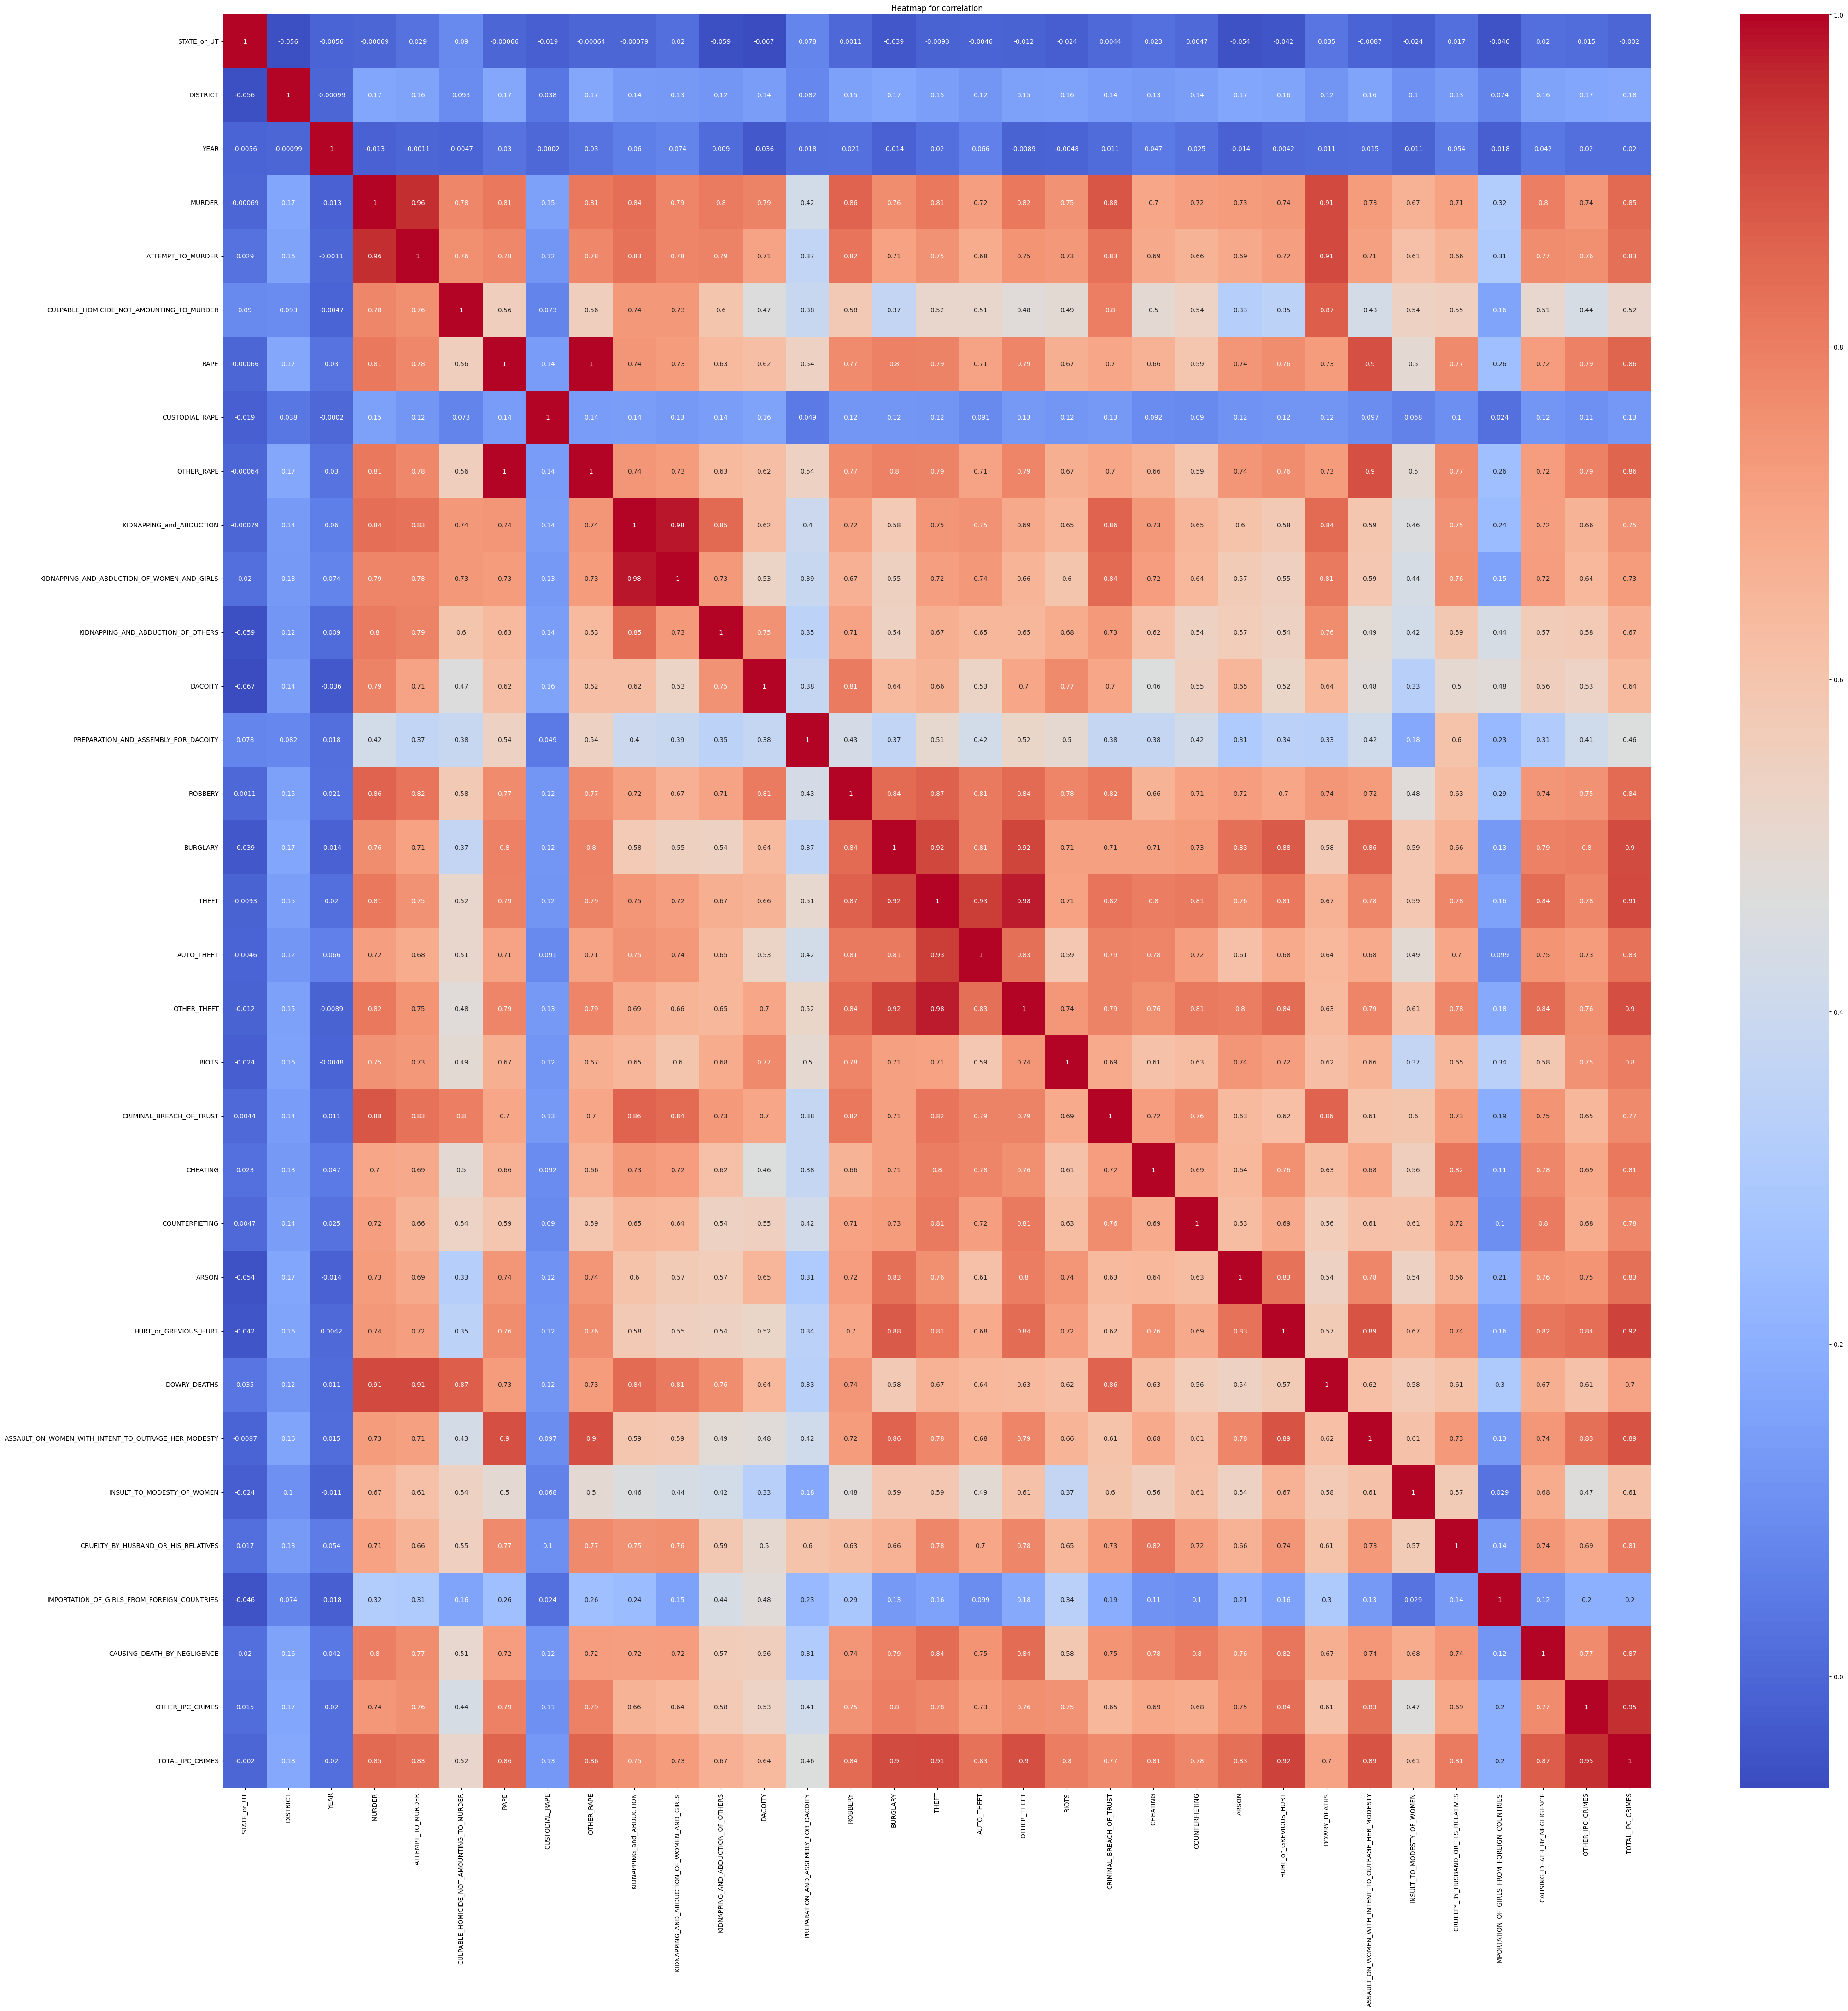

In [19]:
plt.figure(figsize=(50,50))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap for correlation")
plt.show()

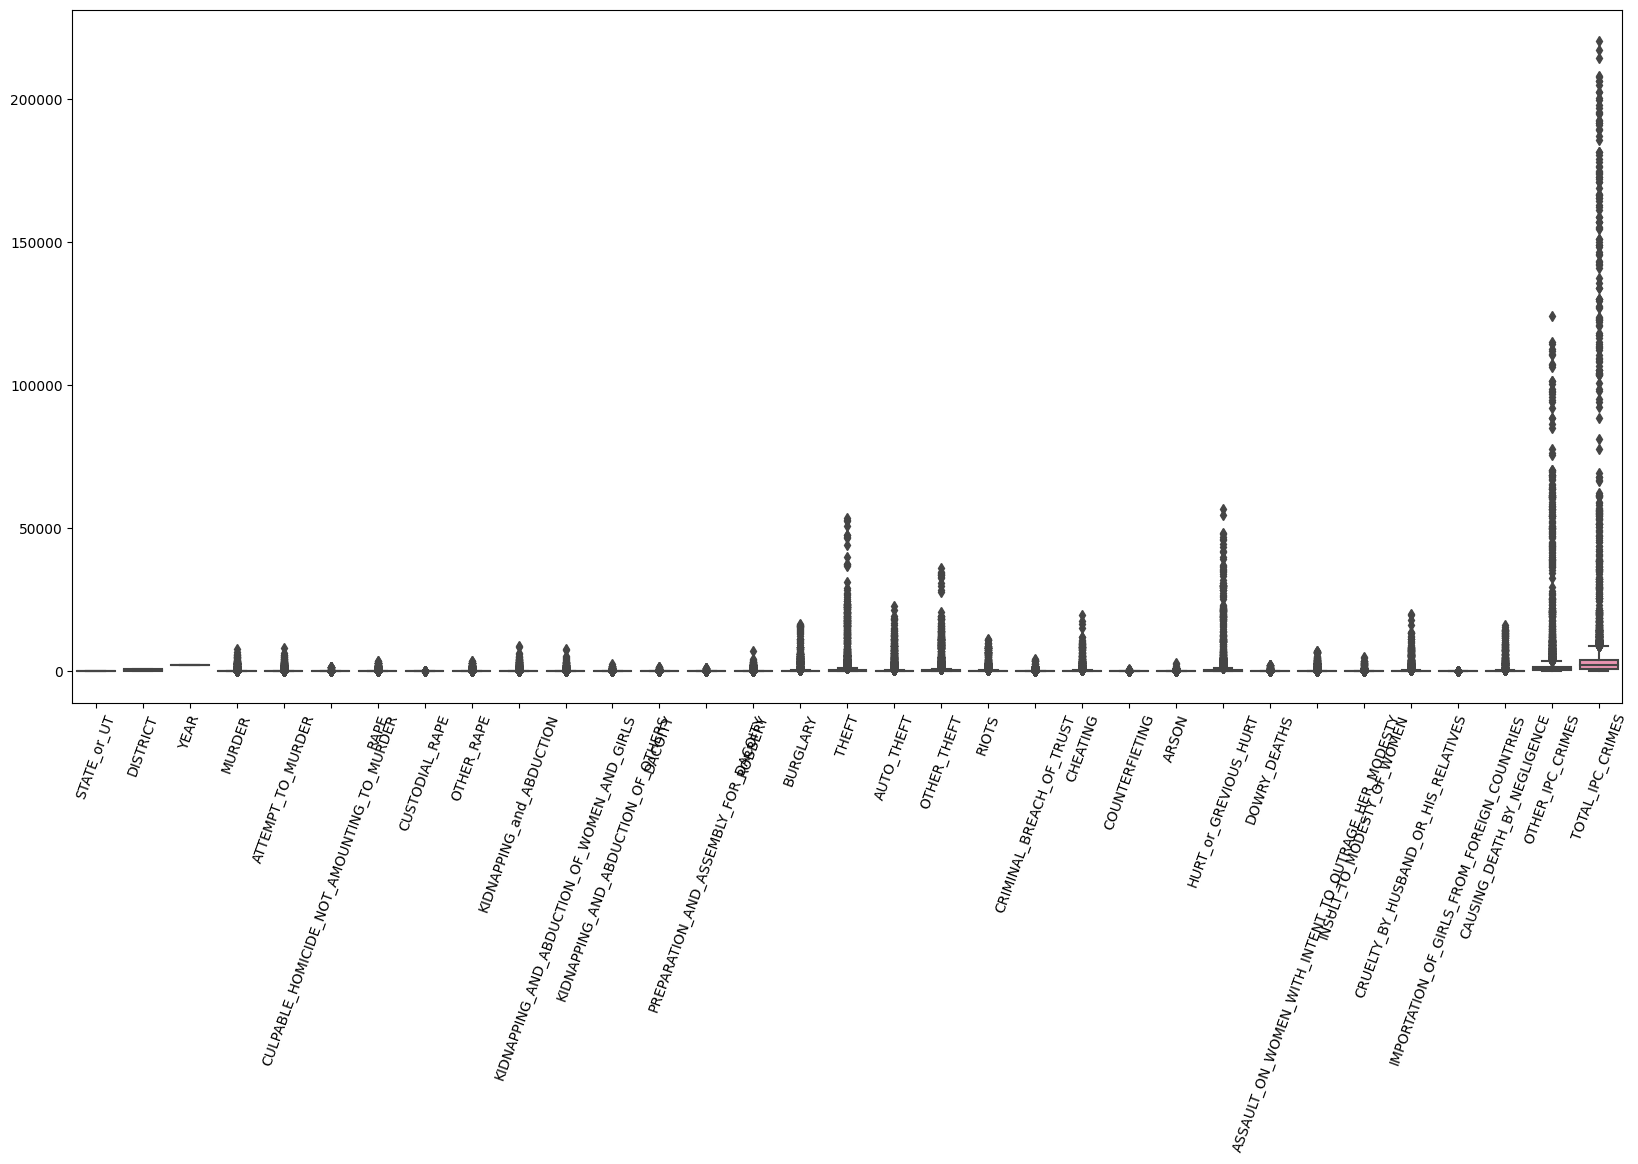

In [20]:
plt.figure(figsize=(20,9))
sns.boxplot(data=data)
plt.xticks(rotation=70)
plt.show()

# Creating Base Model

In [21]:
data.shape

(9017, 33)

In [22]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [23]:
x.shape,y.shape

((9017, 32), (9017,))

## Split Train and Test Data

In [24]:
import sklearn 
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7213, 32), (1804, 32), (7213,), (1804,))

# Linear Regression

In [27]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [28]:
lin.fit(x_train,y_train)

LinearRegression()

In [29]:
lin_p=lin.predict(x_test)
lin_p

array([7736.00019132,  957.99559738, 2391.00416086, ..., 2688.9995326 ,
       2421.00211881,  792.00181661])

In [30]:
lin.coef_

array([-1.49919205e-04, -8.94792949e-06,  6.03399232e-04,  9.99985336e-01,
        1.00000486e+00,  1.00003215e+00,  6.66733627e-01,  3.33463728e-01,
        3.33269899e-01,  6.66669279e-01,  3.33336234e-01,  3.33333045e-01,
        1.00002796e+00,  1.00002167e+00,  1.00000377e+00,  1.00000546e+00,
        6.66665818e-01,  3.33333251e-01,  3.33332567e-01,  9.99996219e-01,
        9.99990071e-01,  1.00000003e+00,  1.00004017e+00,  1.00000756e+00,
        1.00000096e+00,  1.00001285e+00,  9.99991102e-01,  1.00000083e+00,
        1.00000078e+00,  1.00004036e+00,  9.99998281e-01,  9.99999950e-01])

In [31]:
lin.intercept_    

-1.2056443144829245

In [32]:
R2=lin.score(x_train,y_train)
R2

0.9999999999648108

In [33]:
Adj_R2=1-(((1-R2)*(7213-1))/(7213-32-1))
Adj_R2

0.9999999999646539

In [34]:
from sklearn import metrics

In [35]:
mse=metrics.mean_squared_error(y_test,lin_p)
mse

0.04499424667649902

In [36]:
rmse=pow(mse,0.5)
rmse

0.21211847320895702

In [37]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":lin_p})
df1

,Actual,Predicted
2899,7736,7736.000191
1598,958,957.995597
5258,2391,2391.004161
6050,2732,2732.004254
3881,543,542.999178
...,...,...
7149,1194,1194.003668
171,1855,1854.999720
6229,2689,2688.999533
8326,2421,2421.002119


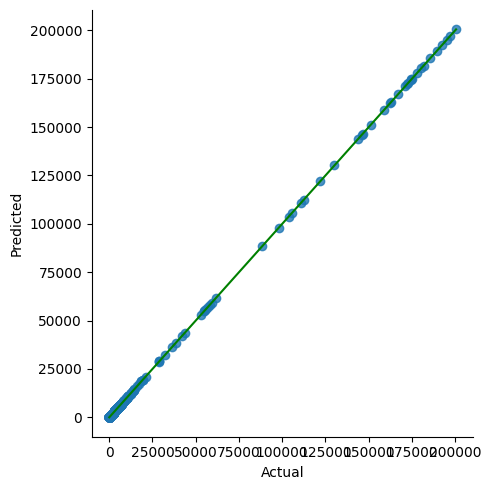

In [38]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Lasso(L1)

Lasso is used to sove the probem of underfitting ,feature selection

In [39]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [40]:
lasso.fit(x_train,y_train)

Lasso()

In [41]:
l_p=lasso.predict(x_test)
l_p

array([7736.15164425,  958.11340693, 2390.92246064, ..., 2689.01905248,
       2421.24629432,  791.99359121])

In [42]:
lasso.coef_    #feature selection 

array([-0.00000000e+00,  3.37313054e-05,  0.00000000e+00,  1.00268470e+00,
        1.00046026e+00,  9.93489311e-01,  1.00001485e+00, -0.00000000e+00,
        1.52530003e-03,  9.96160007e-01,  1.68064748e-03,  5.48145681e-03,
        9.95759585e-01,  1.00020507e+00,  9.99950102e-01,  9.99326560e-01,
        1.00000060e+00,  1.55501094e-05,  1.02989394e-04,  1.00041638e+00,
        1.00232718e+00,  1.00000228e+00,  9.90231361e-01,  9.99301040e-01,
        9.99944508e-01,  9.98608297e-01,  9.99925474e-01,  9.99450382e-01,
        1.00001964e+00,  7.14307799e-01,  1.00012419e+00,  1.00000200e+00])

In [43]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.9999999989912085

In [44]:
l_Adj_R2=1-(((1-l_R2)*(7213-1))/(7213-32-1))
l_Adj_R2

0.9999999989867125

In [45]:
l_mse=metrics.mean_squared_error(y_test,l_p)
l_mse

0.6102370836161551

In [46]:
l_df=pd.DataFrame({"Importances":list(lasso.coef_),"column":list(x_test)})
l_df

,Importances,column
0,-0.000000,STATE_or_UT
1,0.000034,DISTRICT
2,0.000000,YEAR
3,1.002685,MURDER
4,1.000460,ATTEMPT_TO_MURDER
5,0.993489,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER
6,1.000015,RAPE
7,-0.000000,CUSTODIAL_RAPE
8,0.001525,OTHER_RAPE
9,0.996160,KIDNAPPING_and_ABDUCTION


In [47]:
n_df=data.drop(["STATE_or_UT","YEAR","CUSTODIAL_RAPE"],axis=1)
n_df

,DISTRICT,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,OTHER_RAPE,KIDNAPPING_and_ABDUCTION,KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS,KIDNAPPING_AND_ABDUCTION_OF_OTHERS,DACOITY,...,ARSON,HURT_or_GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,3,101,60,17,50,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,28,151,125,1,23,23,53,30,23,8,...,69,1543,7,118,24,154,0,270,754,4125
2,154,101,57,2,27,27,59,34,25,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,172,80,53,1,20,20,25,20,5,1,...,23,795,17,126,38,57,0,233,1181,3140
4,220,82,67,1,23,23,49,26,23,4,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,453,0,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,753,0,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,382,5,6,2,6,6,2,2,0,0,...,1,186,0,2,0,1,0,44,392,787
9015,589,24,21,10,7,7,17,14,3,5,...,20,632,0,7,2,5,0,219,1668,3494


In [48]:
n_x=n_df.iloc[:,0:-1]
n_y=n_df.iloc[:,-1]

In [49]:
nx_train,nx_test,ny_train,ny_test=train_test_split(n_x,n_y,test_size=0.2,random_state=101)

In [50]:
nx_train.shape,nx_test.shape,ny_train.shape,ny_test.shape

((7213, 29), (1804, 29), (7213,), (1804,))

In [51]:
lin.fit(nx_train,ny_train)

LinearRegression()

In [52]:
n_p=lin.predict(nx_test)

In [53]:
n_R2=lin.score(nx_train,ny_train)
n_R2

0.999999999937231

In [54]:
n_Adj_R2=1-(((1-n_R2)*(7213-1))/(7213-29-1))
n_Adj_R2

0.9999999999369775

In [55]:
n_mse=metrics.mean_squared_error(ny_test,n_p)
n_mse

3.905364190898395e-06

In [56]:
n_df1=pd.DataFrame({"Actual_n":ny_test,"Predicted_n":n_p})
n_df1

,Actual_n,Predicted_n
8741,3065,3065.001687
4584,1336,1336.000824
5420,8008,8007.999305
8808,31,30.999398
1881,976,975.999035
...,...,...
1465,145,145.001389
2198,180,179.999835
5753,1059,1059.002261
1564,869,869.000154


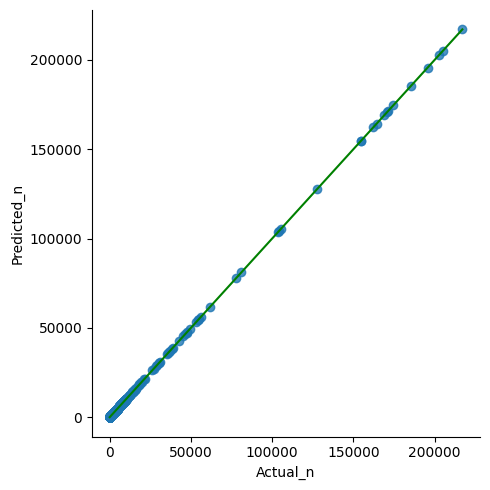

In [57]:
sns.lmplot(x="Actual_n",y="Predicted_n",data=n_df1,fit_reg=False)
d_line=np.arange(n_df1.min().min(),n_df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Ridge(L2)

#### Ridge regression is mostly used to reduce the overfitting in the model

In [58]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [59]:
ridge.fit(x_train,y_train)

Ridge()

In [60]:
r_p=ridge.predict(x_test)

In [61]:
list(ridge.coef_)

[-0.0001496758942486996,
 -8.925899300517658e-06,
 0.0006038190655183075,
 0.9999857150537954,
 1.0000047546670172,
 1.0000303918012874,
 0.665674023782846,
 0.33135451134924715,
 0.33433037092970513,
 0.6666687220611706,
 0.333337117703012,
 0.3333340890098773,
 1.0000285892715763,
 1.0000222414155615,
 1.0000038617564915,
 1.0000054730644408,
 0.6666856153737154,
 0.3333133652468263,
 0.33331276778036634,
 0.9999962497905552,
 0.9999904162631862,
 1.0000000265091804,
 1.0000378386540125,
 1.0000068356966247,
 1.0000010060116726,
 1.0000122278580346,
 0.9999906512947424,
 1.00000105246743,
 1.0000007046931552,
 0.9999889073553796,
 0.999998256802559,
 0.9999999503113497]

In [62]:
r_df=pd.DataFrame({"Coef":list(ridge.coef_),"col":list(x_test)})
r_df

,Coef,col
0,-0.000150,STATE_or_UT
1,-0.000009,DISTRICT
2,0.000604,YEAR
3,0.999986,MURDER
4,1.000005,ATTEMPT_TO_MURDER
5,1.000030,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER
6,0.665674,RAPE
7,0.331355,CUSTODIAL_RAPE
8,0.334330,OTHER_RAPE
9,0.666669,KIDNAPPING_and_ABDUCTION


In [63]:
r_R2=ridge.score(x_train,y_train)
r_R2

0.9999999999648104

In [64]:
r_AdR2=1-(((1-r_R2)*(7213-1))/(7213-32-1))
r_AdR2

0.9999999999646535

In [65]:
r_mse=metrics.mean_squared_error(y_test,r_p)
r_mse

0.044994284077945416

# Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [67]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
rfr_p=rfr.predict(x_test)

In [69]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.9989143682833033

In [70]:
rf_adr=1-(((1-rf_rsq)*(7213-1))/(7213-32-1))
rf_adr

0.9989095298132568

In [71]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

2321102.5856955666

In [72]:
rf_df=pd.DataFrame({"Actual":y_test,"Predicted":rfr_p})
rf_df

,Actual,Predicted
2899,7736,7825.34
1598,958,963.68
5258,2391,2359.90
6050,2732,2738.47
3881,543,575.81
...,...,...
7149,1194,1129.78
171,1855,1892.96
6229,2689,2757.61
8326,2421,2283.73


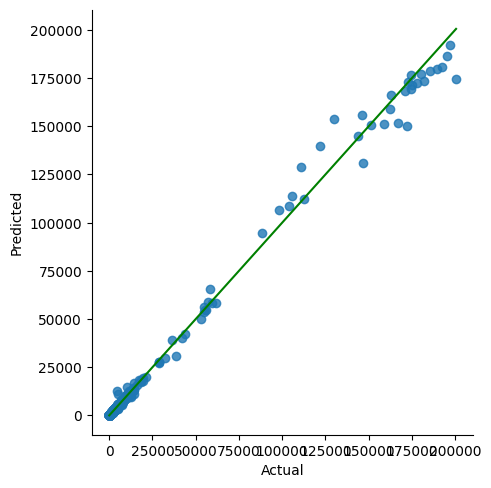

In [73]:
sns.lmplot(x="Actual",y="Predicted",data=rf_df,fit_reg=False)
d_line=np.arange(rf_df.min().min(),rf_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Boosting

## 1.XG-Boost Regressor

###  advantages of XGBoost is its ability to handle missing data

In [74]:
from xgboost import XGBRFRegressor
xgb=XGBRFRegressor()

In [75]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [76]:
xg_p=xgb.predict(x_test)

In [77]:
xg_rsq=xgb.score(x_train,y_train)
xg_rsq

0.9983490259391863

In [78]:
xg_adr=1-(((1-xg_rsq)*(7213-1))/(7213-32-1))
xg_adr

0.9983416678375225

In [79]:
xg_mse=metrics.mean_squared_error(y_test,xg_p)
xg_mse

2489242.5667013647

In [80]:
xg_df=pd.DataFrame({"Actual":y_test,"Predicted":xg_p})
xg_df

,Actual,Predicted
2899,7736,6969.096191
1598,958,1283.411499
5258,2391,2440.406738
6050,2732,2614.605957
3881,543,749.363525
...,...,...
7149,1194,1189.102295
171,1855,2120.077881
6229,2689,2629.222900
8326,2421,2181.483887


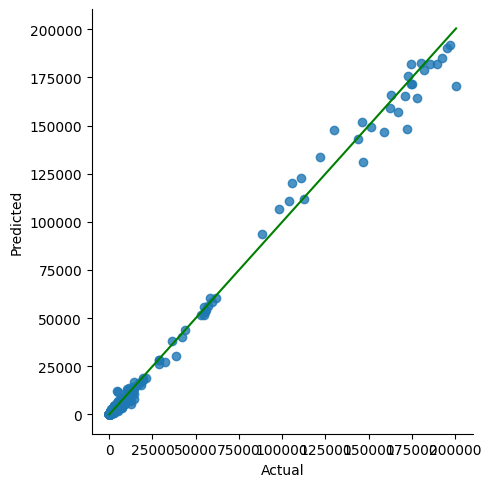

In [81]:
sns.lmplot(x="Actual",y="Predicted",data=xg_df,fit_reg=False)
d_line=np.arange(xg_df.min().min(),xg_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

## AdaBoostRegressor 

In [ ]:
 A boosting gives high accuracy. Missclassification 

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [83]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [84]:
ad_p=ad.predict(x_test)

In [85]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

0.9577354375856385

In [86]:
ad_adr=1-(((1-ad_rsq)*(7213-1))/(7213-32-1))
ad_adr

0.9575470718478586

In [87]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

14682220.659544667

# Final result before EDA

In [88]:
l1=["Linear Regression","Random Forest Regressor","XG-Boost Regressor","AdaBoostRegressor"]
l2=[R2,rf_rsq,xg_rsq,ad_rsq]
l3=[Adj_R2,rf_adr,xg_adr,ad_adr]
l4=[mse,rfr_MSE,xg_mse,ad_MSE]

In [89]:
before_eda=pd.DataFrame({"Model_Name":l1,"R-square":l2,"Adj_R2":l3,"MSE":l4})
before_eda

,Model_Name,R-square,Adj_R2,MSE
0,Linear Regression,1.000000,1.000000,4.499425e-02
1,Random Forest Regressor,0.998914,0.998910,2.321103e+06
2,XG-Boost Regressor,0.998349,0.998342,2.489243e+06
3,AdaBoostRegressor,0.957735,0.957547,1.468222e+07


# Model building after EDA

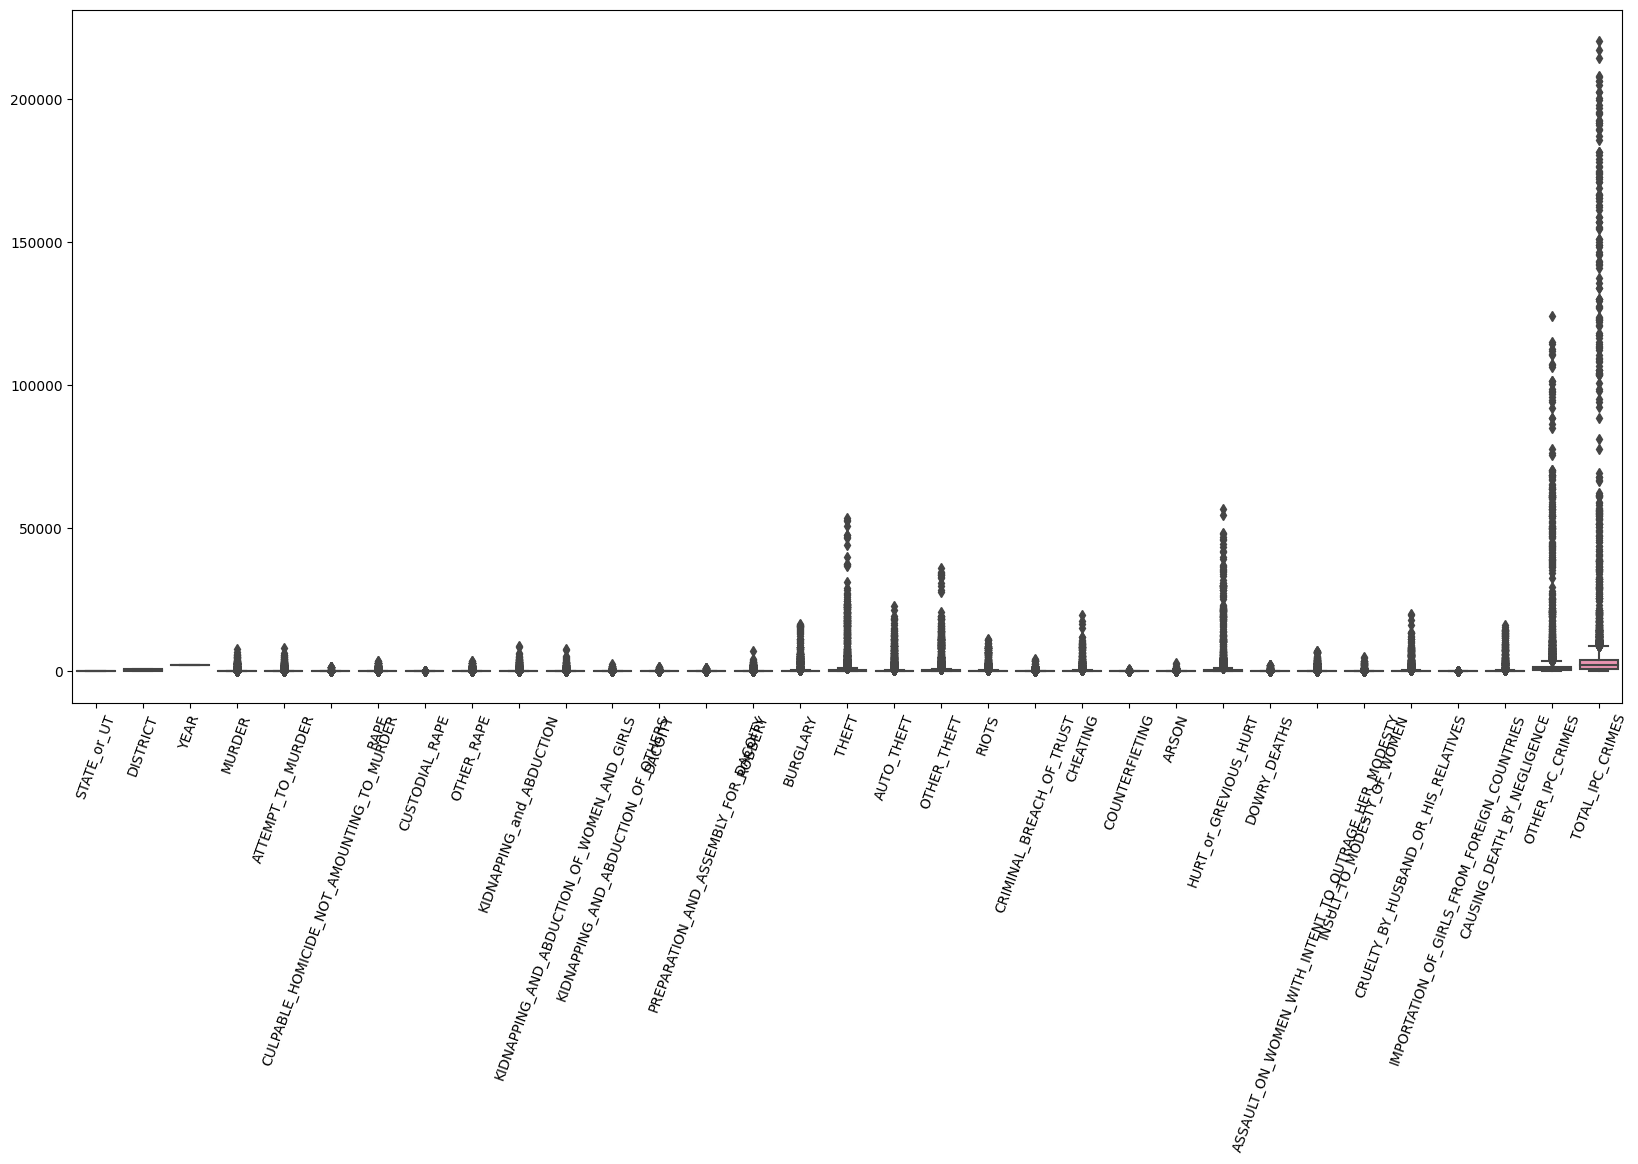

In [90]:
plt.figure(figsize=(20,9))
sns.boxplot(data=data)
plt.xticks(rotation=70)
plt.show()

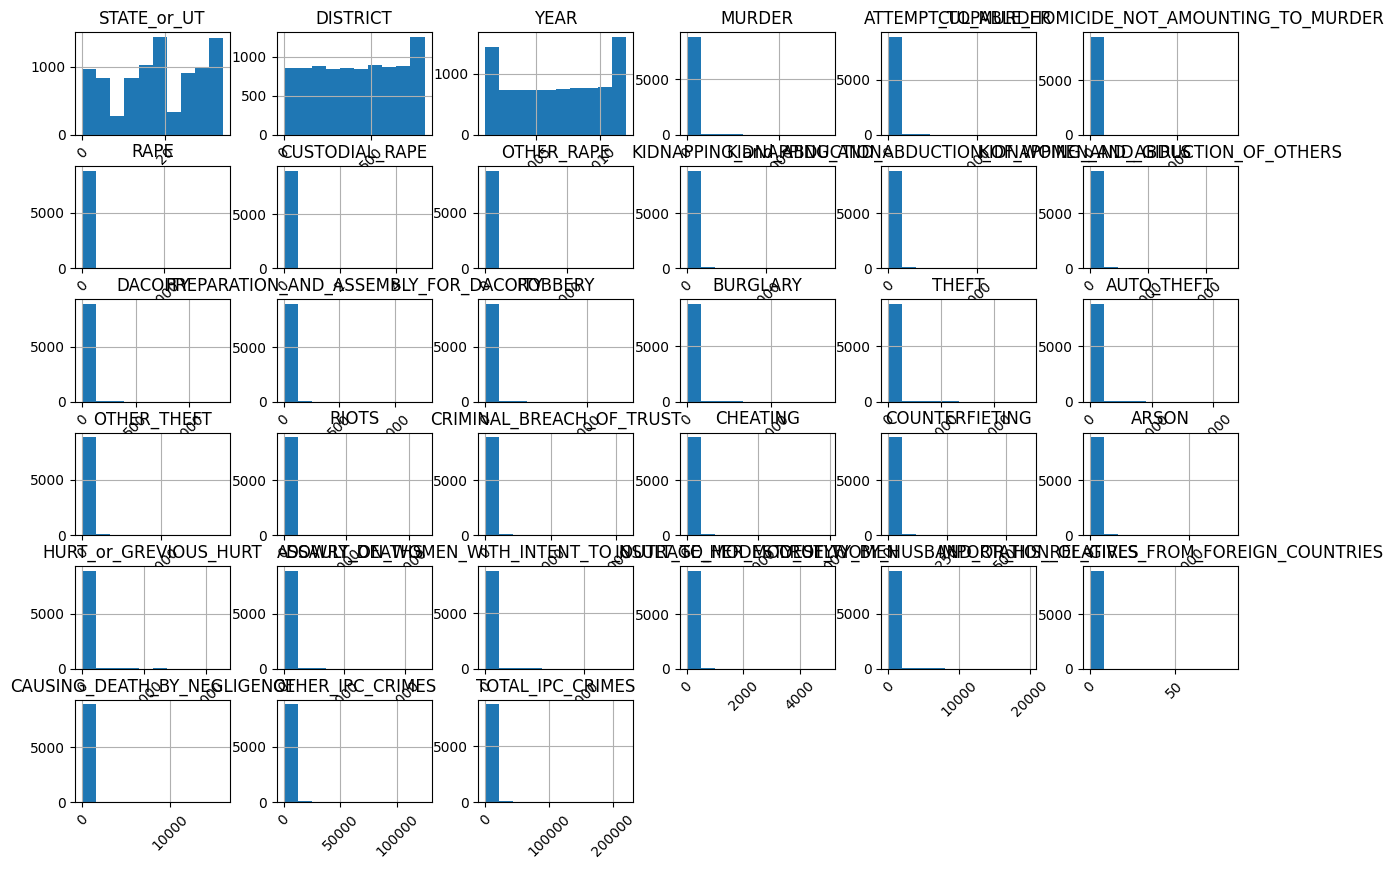

In [91]:
data.hist(figsize=(15,10),xrot=45)
plt.xticks(rotation=70)
plt.show()

In [92]:
data.dtypes

STATE_or_UT                                            int32
DISTRICT                                               int32
YEAR                                                   int64
MURDER                                                 int64
ATTEMPT_TO_MURDER                                      int64
CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER              int64
RAPE                                                   int64
CUSTODIAL_RAPE                                         int64
OTHER_RAPE                                             int64
KIDNAPPING_and_ABDUCTION                               int64
KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS            int64
KIDNAPPING_AND_ABDUCTION_OF_OTHERS                     int64
DACOITY                                                int64
PREPARATION_AND_ASSEMBLY_FOR_DACOITY                   int64
ROBBERY                                                int64
BURGLARY                                               int64
THEFT                   

In [93]:
#TOTAL_IPC_CRIMES

In [94]:
#OTHER_IPC_CRIMES

<AxesSubplot: xlabel='OTHER_IPC_CRIMES', ylabel='Count'>

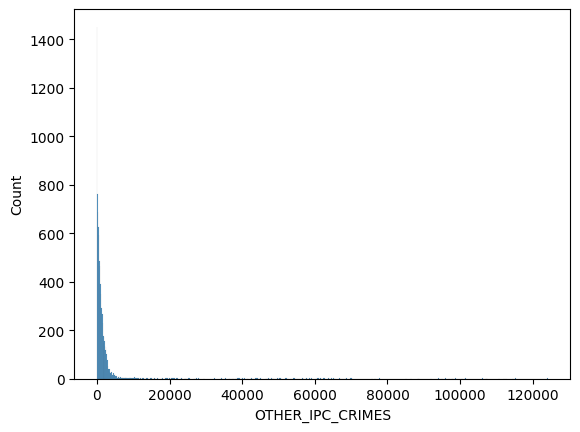

In [95]:
sns.histplot(data.OTHER_IPC_CRIMES)

<AxesSubplot: xlabel='OTHER_IPC_CRIMES', ylabel='Density'>

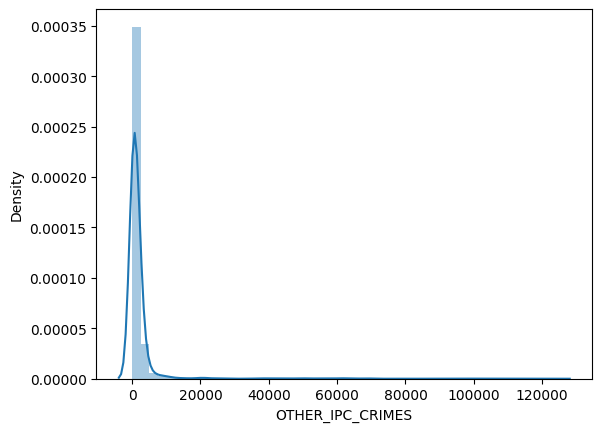

In [96]:
sns.distplot(data.OTHER_IPC_CRIMES)

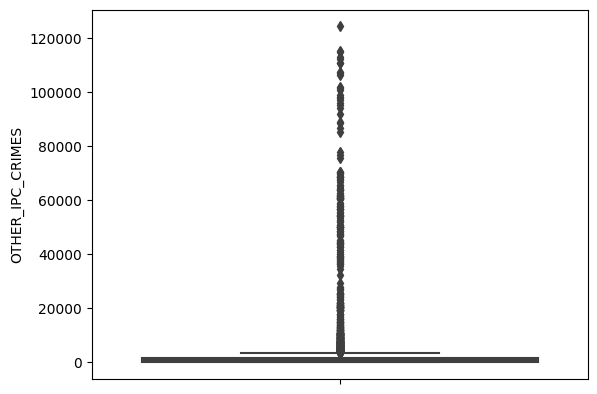

In [97]:
sns.boxplot(data=data,y='OTHER_IPC_CRIMES')
plt.show()

In [98]:
data.OTHER_IPC_CRIMES.describe()

count      9017.000000
mean       2174.299434
std        7988.438462
min           0.000000
25%         265.000000
50%         745.000000
75%        1608.000000
max      124176.000000
Name: OTHER_IPC_CRIMES, dtype: float64

In [99]:
iqr=data.OTHER_IPC_CRIMES.quantile(0.75)-data.OTHER_IPC_CRIMES.quantile(0.25)
iqr

1343.0

In [100]:
ub=data['OTHER_IPC_CRIMES'].quantile(0.75)+(iqr*3)
lb=data['OTHER_IPC_CRIMES'].quantile(0.25)-(iqr*3)
print(lb,ub)

-3764.0 5637.0


In [101]:
data.loc[data['OTHER_IPC_CRIMES']>ub,'OTHER_IPC_CRIMES']=ub
data.loc[data['OTHER_IPC_CRIMES']<lb,'OTHER_IPC_CRIMES']=lb

<AxesSubplot: xlabel='OTHER_IPC_CRIMES', ylabel='Density'>

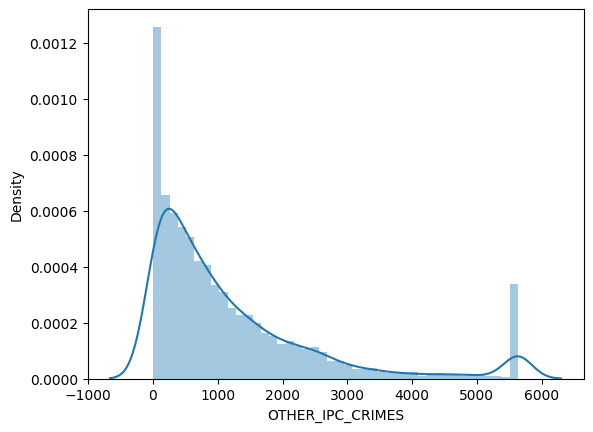

In [102]:
sns.distplot(data.OTHER_IPC_CRIMES)

# Creating Model after EDA

In [103]:
Total_IPC_Crimes=data["TOTAL_IPC_CRIMES"]
Total_IPC_Crimes

0       4154
1       4125
2       5818
3       3140
4       6507
        ... 
9012      60
9013      60
9014     787
9015    3494
9016    4281
Name: TOTAL_IPC_CRIMES, Length: 9017, dtype: int64

In [104]:
df=data.drop(['TOTAL_IPC_CRIMES'],axis=1)
df.head(2)

,STATE_or_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_and_ABDUCTION,...,COUNTERFIETING,ARSON,HURT_or_GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES
0,1,3,2001,101,60,17,50,0,50,46,...,1,30,1131,16,149,34,175,0,181,1518
1,1,28,2001,151,125,1,23,0,23,53,...,8,69,1543,7,118,24,154,0,270,754


In [105]:
e_x=df
e_y=Total_IPC_Crimes

# Splitting train and test

In [106]:
ex_train,ex_test,ey_train,ey_test=train_test_split(e_x,e_y,test_size=0.2,random_state=100)

In [107]:
ex_train.shape,ex_test.shape,ey_train.shape,ey_test.shape

((7213, 32), (1804, 32), (7213,), (1804,))

# Linear Regression

In [108]:
lin.fit(ex_train,ey_train)

LinearRegression()

In [109]:
lin_p1=lin.predict(ex_test)
lin_p1

array([7163.28009171, 1445.45148908, 2463.98005656, ..., 3578.37105047,
       4785.5396248 ,  401.07624981])

In [110]:
e_R2=lin.score(ex_train,ey_train)
e_R2

0.979830432473319

In [111]:
e_adjR2=1-(((1-e_R2)*(7213-1))/(7213-32-1))
e_adjR2

0.9797405402503588

In [112]:
e_mse=metrics.mean_squared_error(ey_test,lin_p1)
e_mse

13568160.421828298

In [113]:
e_rmse=pow(e_mse,0.5)
e_rmse

3683.4983944381324

In [114]:
df2=pd.DataFrame({"Actual":ey_test,"Predicted":lin_p1})
df2

,Actual,Predicted
2899,7736,7163.280092
1598,958,1445.451489
5258,2391,2463.980057
6050,2732,2536.316542
3881,543,-499.992219
...,...,...
7149,1194,1217.664860
171,1855,1656.435185
6229,2689,3578.371050
8326,2421,4785.539625


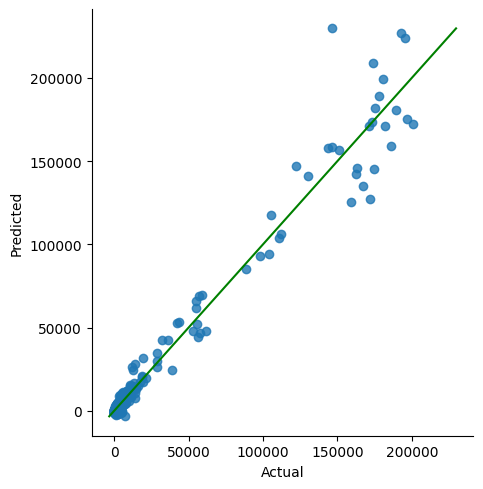

In [115]:
sns.lmplot(x="Actual",y="Predicted",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# XG boost

In [116]:
from xgboost import XGBRFRegressor
xg1=XGBRFRegressor()

In [117]:
xg1.fit(ex_train,ey_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [118]:
xg1_p=xg1.predict(ex_test)

In [119]:
R_xg1=xg1.score(ex_train,ey_train)
R_xg1

0.9979339011286679

In [120]:
Adj_xg1=1-(((1-R_xg1)*(7213-1))/(7213-32-1))
Adj_xg1

0.9979246928885728

In [121]:
xg1_mse=metrics.mean_squared_error(ey_test,xg1_p)
xg1_mse

5013202.996779209

In [122]:
xg1_df=pd.DataFrame({"Actual":ey_test,"Predicted":xg1_p})
xg1_df

,Actual,Predicted
2899,7736,6968.060059
1598,958,1301.377319
5258,2391,2481.146729
6050,2732,2635.399902
3881,543,747.374817
...,...,...
7149,1194,1207.684448
171,1855,2141.512207
6229,2689,2615.870850
8326,2421,2172.482178


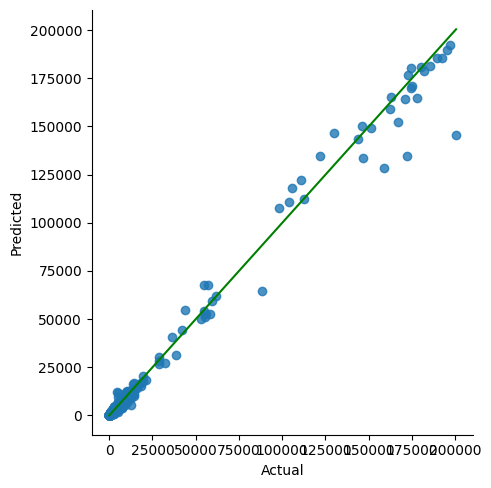

In [123]:
sns.lmplot(x="Actual",y="Predicted",data=xg1_df,fit_reg=False)
d_line=np.arange(xg1_df.min().min(),xg1_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Random Forest Regression

In [124]:
from sklearn.ensemble import RandomForestRegressor
rfr1=RandomForestRegressor()

In [125]:
rfr1.fit(ex_train,ey_train)

RandomForestRegressor()

In [126]:
rfr1_p=rfr1.predict(ex_test)

In [127]:
R_rf1=rfr1.score(ex_train,ey_train)
R_rf1

0.9987665373566548

In [128]:
Adj_rf1=1-(((1-R_rf1)*(7213-1))/(7213-32-1))
Adj_rf1

0.9987610400301106

In [129]:
Rf_mse1=metrics.mean_squared_error(ey_test,rfr1_p)
Rf_mse1

4246457.083853659

In [130]:
Rf_df=pd.DataFrame({"Actual":ey_test,"Predicted":rfr1_p})
Rf_df

,Actual,Predicted
2899,7736,7897.20
1598,958,968.17
5258,2391,2377.16
6050,2732,2730.69
3881,543,576.40
...,...,...
7149,1194,1133.56
171,1855,1889.00
6229,2689,2747.58
8326,2421,2269.99


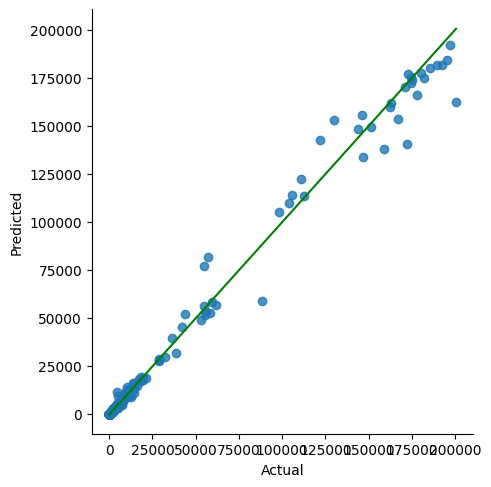

In [131]:
sns.lmplot(x="Actual",y="Predicted",data=Rf_df,fit_reg=False)
d_line=np.arange(Rf_df.min().min(),Rf_df.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# After EDA Final result

In [132]:
list5=["RandomForestRegressor","LinearRegression","XGBRFRegressor"]
list6=[R_rf1,e_R2,R_xg1]
list7=[Adj_rf1,e_adjR2,Adj_xg1]
list8=[Rf_mse1,e_mse,xg1_mse]

In [133]:
after_eda=pd.DataFrame({"Model_Name":list5,"R-square":list6,"Adj_R2":list7,"MSE":list8})
after_eda

,Model_Name,R-square,Adj_R2,MSE
0,RandomForestRegressor,0.998767,0.998761,4.246457e+06
1,LinearRegression,0.979830,0.979741,1.356816e+07
2,XGBRFRegressor,0.997934,0.997925,5.013203e+06


In [134]:
before_eda

,Model_Name,R-square,Adj_R2,MSE
0,Linear Regression,1.000000,1.000000,4.499425e-02
1,Random Forest Regressor,0.998914,0.998910,2.321103e+06
2,XG-Boost Regressor,0.998349,0.998342,2.489243e+06
3,AdaBoostRegressor,0.957735,0.957547,1.468222e+07


## Conclusion

Linear Regression is best fitted model.

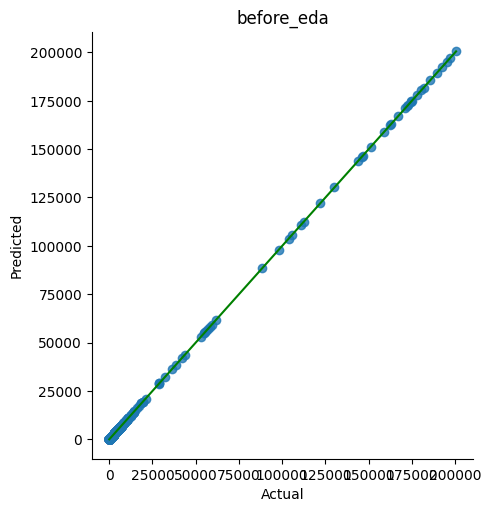

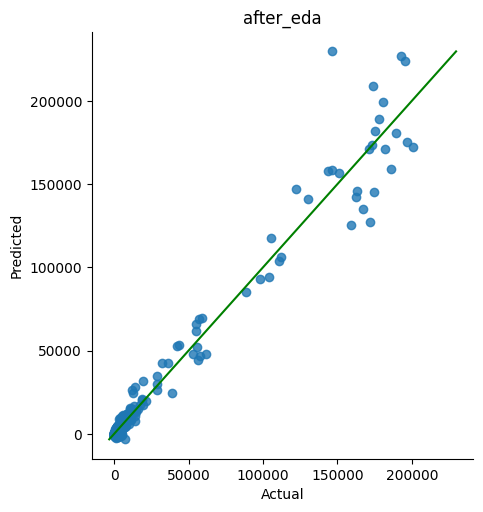

In [135]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.title("before_eda")
plt.show()
sns.lmplot(x="Actual",y="Predicted",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.title("after_eda")
plt.show()